# Exercise 05
## Lars Kühmichel, Nicolas Wolf

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import sympy as sym
import sympy.stats as symstats
from scipy.special import kl_div

In [25]:
plt.rc("figure", dpi=150)
plt.rc("legend", fontsize=6)

## Task 1: Kullback-Leiber Divergence of Two Normal Distributions
### 1. What is the specific value of $KL(P||Q)$ when $\mu_1 = \mu_2$ and $\sigma_1 = \sigma_2$?

It's zero, since $p(x) = q(x) \rightarrow \log \frac{p(x)}{q(x)} = \log 1 = 0$

### 2. Calculate the specific values for $KL(P||Q)$ and $KL(Q||P)$ for the given $\mu$ and $\sigma$.

We use sympy:

In [26]:
x = sym.Symbol("x", real=True)
mu1 = sym.Symbol("mu_1", real=True)
mu2 = sym.Symbol("mu_2", real=True)
sig1 = sym.Symbol("sigma_1", positive=True)
sig2 = sym.Symbol("sigma_2", positive=True)

In [27]:
def pdf(x, mu, sigma):
    # the normal distribution pdf
    N = 1 / (sigma * sym.sqrt(2 * sym.pi))
    e = ((x - mu) / sigma) ** 2
    return N * sym.exp(-e / 2)

In [28]:
p = pdf(x, mu1, sig1)
q = pdf(x, mu2, sig2)

p

sqrt(2)*exp(-(-mu_1 + x)**2/(2*sigma_1**2))/(2*sqrt(pi)*sigma_1)

Plot both distributions

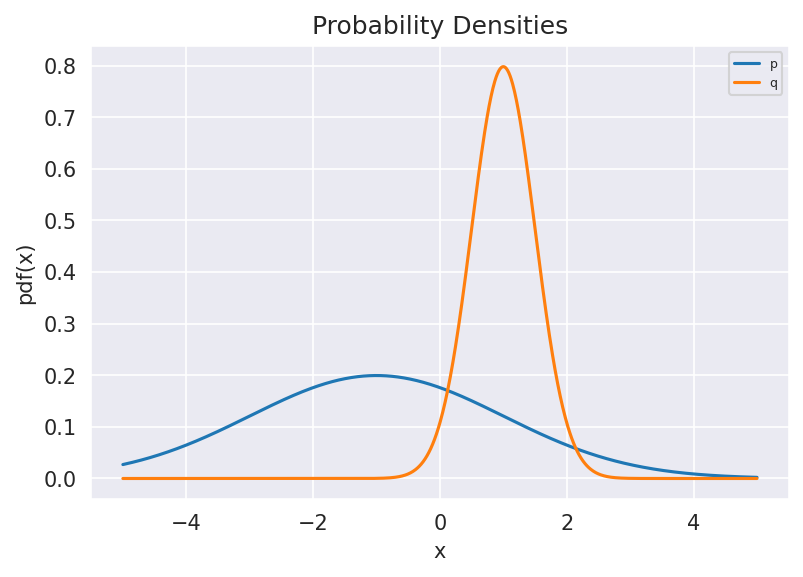

In [35]:
plotx = np.linspace(-5, 5, 1000)

f1 = sym.lambdify([x, mu1, sig1], p)
f2 = sym.lambdify([x, mu2, sig2], q)

plt.plot(plotx, f1(plotx, -1, 2), label="p")
plt.plot(plotx, f2(plotx, 1, 0.5), label="q")
plt.xlabel("x")
plt.ylabel("pdf(x)")
plt.title("Probability Densities")
plt.legend()

In [30]:
def DKL(x, p, q):
    return sym.integrate(p * sym.log(p / q), (x, -sym.oo, sym.oo))

KL1 = DKL(x, p, q).simplify()
KL2 = DKL(x, q, p).simplify()

KL1

(mu_1**2 - 2*mu_1*mu_2 + mu_2**2 + sigma_1**2 - sigma_2**2 + log(sigma_2**(2*sigma_2**2)/sigma_1**(2*sigma_2**2)))/(2*sigma_2**2)

In [31]:
KL1.subs([(mu1, -1), (sig1, 2), (mu2, 1), (sig2, sym.S.Half)]).evalf(100)

14.11370563888010938116553575708364686384899973127948949175863998101321275606061056878827334600716262

In [32]:
KL2.subs([(mu1, -1), (sig1, 2), (mu2, 1), (sig2, sym.S.Half)]).evalf(100)

1.417544361119890618834464242916353136151000268720510508241360018986787243939389431211726653992837375

As expected, the KL-Divergence is asymmetric. Since samples from $q$ will mostly be in-distribution for $p$, it is a much better fit for $p$ than vice versa. Thus, $KL(Q||P) < KL(P||Q)$.

## Task 2: M-Step in a Linear Gaussian State-Space Model

Skip?